<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/ccd_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data set
data=pd.read_csv("/content/creditcard..csv")

Checking the target classes

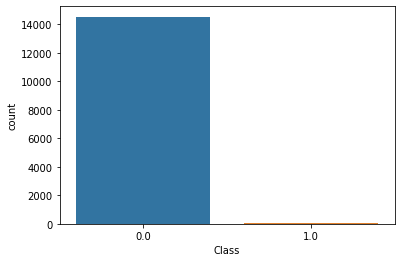

In [3]:
import seaborn as sns
sns.countplot(x='Class', data=data)

Data Pre-processing

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595 entries, 0 to 14594
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14595 non-null  int64  
 1   V1      14595 non-null  float64
 2   V2      14595 non-null  float64
 3   V3      14595 non-null  float64
 4   V4      14595 non-null  float64
 5   V5      14595 non-null  float64
 6   V6      14595 non-null  float64
 7   V7      14595 non-null  float64
 8   V8      14595 non-null  float64
 9   V9      14595 non-null  float64
 10  V10     14595 non-null  float64
 11  V11     14595 non-null  float64
 12  V12     14595 non-null  float64
 13  V13     14595 non-null  float64
 14  V14     14595 non-null  float64
 15  V15     14595 non-null  float64
 16  V16     14595 non-null  float64
 17  V17     14595 non-null  float64
 18  V18     14595 non-null  float64
 19  V19     14595 non-null  float64
 20  V20     14595 non-null  float64
 21  V21     14594 non-null  float64
 22

In [5]:
# no null values
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,...,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000
mean,10789.397670,-0.235869,0.281890,0.836157,0.301529,-0.120216,0.127655,-0.156335,-0.013457,0.958179,...,-0.067785,-0.159067,-0.034452,0.012024,0.117077,0.035892,0.013886,0.003275,64.167390,0.004180
std,8185.099006,1.733224,1.400483,1.580158,1.496743,1.298186,1.323321,1.245896,1.261783,1.225899,...,0.868051,0.621986,0.495948,0.587172,0.429212,0.554197,0.398324,0.254092,177.256238,0.064518
min,0.000000,-27.670569,-34.607649,-24.667741,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,3120.000000,-0.970401,-0.287015,0.398237,-0.625120,-0.715802,-0.626724,-0.613229,-0.182259,0.236955,...,-0.272055,-0.552828,-0.172879,-0.339159,-0.137046,-0.369383,-0.075588,-0.014270,5.490000,0.000000
50%,9765.000000,-0.318075,0.251920,0.954945,0.224760,-0.189767,-0.150116,-0.107062,0.017199,0.941903,...,-0.131175,-0.123806,-0.044647,0.060358,0.156752,-0.033930,-0.000373,0.016598,15.900000,0.000000
75%,18792.500000,1.162615,0.884715,1.598016,1.190561,0.350648,0.506798,0.421533,0.265329,1.628664,...,0.020955,0.228997,0.071106,0.393153,0.393032,0.369598,0.098414,0.073539,52.915000,0.000000
max,25810.000000,1.960497,10.819665,4.101716,11.927512,34.099309,21.393069,34.303177,11.580797,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [6]:
# no null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
data_real = data.replace(np.inf, np.nan)

In [8]:
data_real.isnull().sum().sum()

10

In [9]:
data_df = data_real.dropna(axis=0)

In [10]:
data_df.isnull().sum().sum()

0

In [11]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14589,25807,1.155575,-0.166324,0.596891,0.724962,-0.615836,-0.225236,-0.279063,0.116282,0.756646,...,-0.283024,-0.715949,0.116222,0.070997,0.187930,0.318972,-0.018934,0.011569,20.99,0.0
14590,25807,-0.769852,2.704375,-2.083145,1.018899,1.083598,-1.255315,1.242032,-0.525902,1.466585,...,-0.448296,-0.071608,0.118632,-0.180557,-0.288828,-0.448297,0.608821,-0.186236,0.89,0.0
14591,25808,-0.897475,0.963371,0.997351,0.329928,0.998766,-1.287190,0.713085,0.019353,-0.859152,...,0.118559,0.159961,-0.234309,0.381128,0.193193,-0.511092,0.092647,0.150261,1.00,0.0
14592,25809,-0.377066,0.984515,0.988848,-0.261443,0.563332,0.197124,0.489867,0.281753,-0.543286,...,-0.234987,-0.625894,-0.077312,-0.732204,-0.187063,0.128292,0.254469,0.076702,3.57,0.0


In [12]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
data_df['scaled_amount'] = rob_scaler.fit_transform(
    data_df['Amount'].values.reshape(-1, 1))
data_df['scaled_time'] = rob_scaler.fit_transform(
  data_df['Time'].values.reshape(-1, 1))
    
data_df.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,2.819610,-0.623123
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.278545,-0.623123
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,7.649130,-0.623060
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,2.268846,-0.623060
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.140538,-0.622996


In [13]:
x = data_df.drop(['Class'], axis = 1)

In [14]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [15]:
y = data_df['Class']

In [16]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14589    0.0
14590    0.0
14591    0.0
14592    0.0
14593    0.0
Name: Class, Length: 14594, dtype: float64

Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trans = le.fit_transform(y)
le_fid = LabelEncoder()

Applying SMOTE with Over Sampling

In [18]:
#Apply SMOTE to create synthetic observations from minority class
#Over sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto',random_state=None)
x_sampled,y_sampled = sm.fit_resample(x,y.values.ravel())

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(data[data.Class==0])
Source_data_fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

#Percentage of fraudlent records in sampled data
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in original dataset:0.41797999177744277%
Percentage of fraud counts in the new data:50.0%


Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(x_sampled ,y_sampled,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))

X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)

Number transactions train dataset:  10215
Number transactions test dataset:  4379
Total number of transactions:  14594

Number transactions train dataset:  20346
Number transactions test dataset:  8720
Total number of transactions:  29066


Feature Importance

In [20]:
# feature importance
mutual_info = mutual_info_classif(X_train_sampled_df, y_train_sampled_df)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_sampled.columns
mutual_info.sort_values(ascending = False)

V4               0.568597
V14              0.563438
V12              0.538897
V3               0.492931
V11              0.485867
V2               0.471600
V10              0.468852
V17              0.457158
V16              0.423060
V6               0.403409
V7               0.395399
V21              0.383251
V9               0.381446
scaled_amount    0.378256
V27              0.365956
V28              0.326499
V5               0.314981
V1               0.301070
V20              0.274760
V18              0.273269
V26              0.270365
scaled_time      0.231191
V23              0.205131
V24              0.202232
V13              0.189294
V8               0.185019
V19              0.169941
V25              0.151793
V15              0.085644
V22              0.078998
dtype: float64

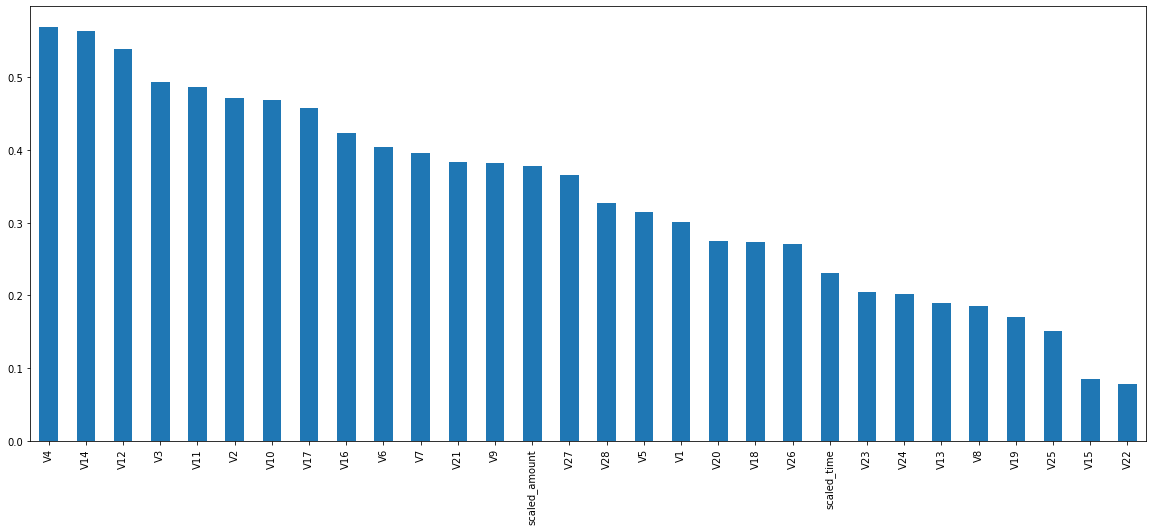

In [21]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

Feature selection

In [22]:
# select top 15 features
selector = SelectKBest(mutual_info_classif, k=15)
selector.fit(X_train_sampled, y_train_sampled)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train_sampled.iloc[:,cols]
new_test = X_test_sampled.iloc[:,cols]

In [23]:
new_train

,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V21,V27,scaled_amount
18818,1.101649,1.965221,1.797819,-0.099534,0.252846,0.593134,-0.184260,0.526722,-2.999932,1.416506,0.688997,0.215641,0.132554,-0.095607,-0.252534
2438,0.074820,1.654761,0.015232,0.449217,0.552624,0.251660,-0.764859,-1.513254,-0.244860,-0.486594,0.516428,-0.631287,0.205118,-0.025784,3.207169
12598,1.476133,1.181615,1.577935,-0.377833,1.192098,-0.272905,-0.291366,0.393378,-2.640234,1.797221,0.151394,0.225393,0.002815,0.087868,-0.219715
19161,7.066317,-12.330230,9.295874,-3.012980,-8.599683,-6.027480,-12.662189,11.639346,-17.471810,-18.691887,-10.268405,-14.915383,1.808898,1.902425,-0.314180
24191,5.122409,-7.288757,6.577668,-3.059256,-2.801662,-3.648724,-7.076953,7.320378,-10.129947,-11.170348,-2.509799,-2.961581,0.635168,0.629860,-0.314180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.075814,0.386020,0.524957,-0.006366,-0.304228,1.314272,-0.274790,2.092676,-2.232266,2.132295,0.287164,0.313172,-0.185859,-0.064870,-0.018977
19648,4.157831,-6.928823,6.755821,-2.654439,-1.557651,-2.785848,-5.325029,5.929618,-8.450039,-10.245356,-1.486006,-0.470472,0.349958,0.695631,-0.314180
9845,-0.007625,1.076496,0.399163,-0.667827,-0.478533,1.643752,-0.575164,1.398984,-1.920441,1.466235,0.022703,0.746793,0.000212,-0.069929,0.001054
10799,-0.295896,1.033580,-0.509189,-0.782769,-0.674604,3.157907,-1.445210,0.450204,-1.950839,1.357853,-0.454086,0.607897,-0.160255,0.062584,-0.085398


Model Training

1 Decision-tree

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train_sampled_df)
test_pred = dt.predict(new_test)

In [25]:
Y_predicted_dt = dt.predict(new_test)
Y_pred_train_dt = dt.predict(new_train)

In [26]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train_sampled_df, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[4337    3]
 [   2 4378]]

 Macro Averaged Accuracy :0.9994266055045872

 Macro Averaged Precision :0.9994260673779012

 Macro Averaged Recall :0.9994271445675214

 Macro Averaged F1-Score :0.9994265928281308

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:0.9994266055045872


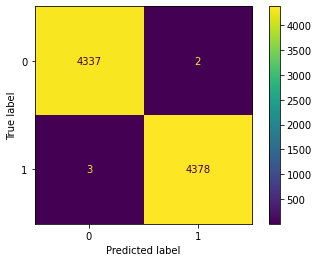

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test_sampled_df,Y_predicted_dt)
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

[Text(0.5875, 0.9666666666666667, 'X[9] <= -1.482\nentropy = 1.0\nsamples = 20346\nvalue = [10194, 10152]'),
 Text(0.325, 0.9, 'X[2] <= 2.22\nentropy = 0.17\nsamples = 9612\nvalue = [243, 9369]'),
 Text(0.275, 0.8333333333333334, 'entropy = 0.0\nsamples = 211\nvalue = [211, 0]'),
 Text(0.375, 0.8333333333333334, 'X[1] <= 1.287\nentropy = 0.033\nsamples = 9401\nvalue = [32, 9369]'),
 Text(0.325, 0.7666666666666667, 'X[14] <= 1.209\nentropy = 0.026\nsamples = 9393\nvalue = [24, 9369]'),
 Text(0.2, 0.7, 'X[3] <= 0.643\nentropy = 0.007\nsamples = 8182\nvalue = [5, 8177]'),
 Text(0.15, 0.6333333333333333, 'X[11] <= -16.176\nentropy = 0.003\nsamples = 8179\nvalue = [2, 8177]'),
 Text(0.1, 0.5666666666666667, 'X[7] <= 10.195\nentropy = 0.07\nsamples = 240\nvalue = [2, 238]'),
 Text(0.05, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15, 0.5, 'entropy = 0.0\nsamples = 238\nvalue = [0, 238]'),
 Text(0.2, 0.5666666666666667, 'entropy = 0.0\nsamples = 7939\nvalue = [0, 7939]'),
 Tex

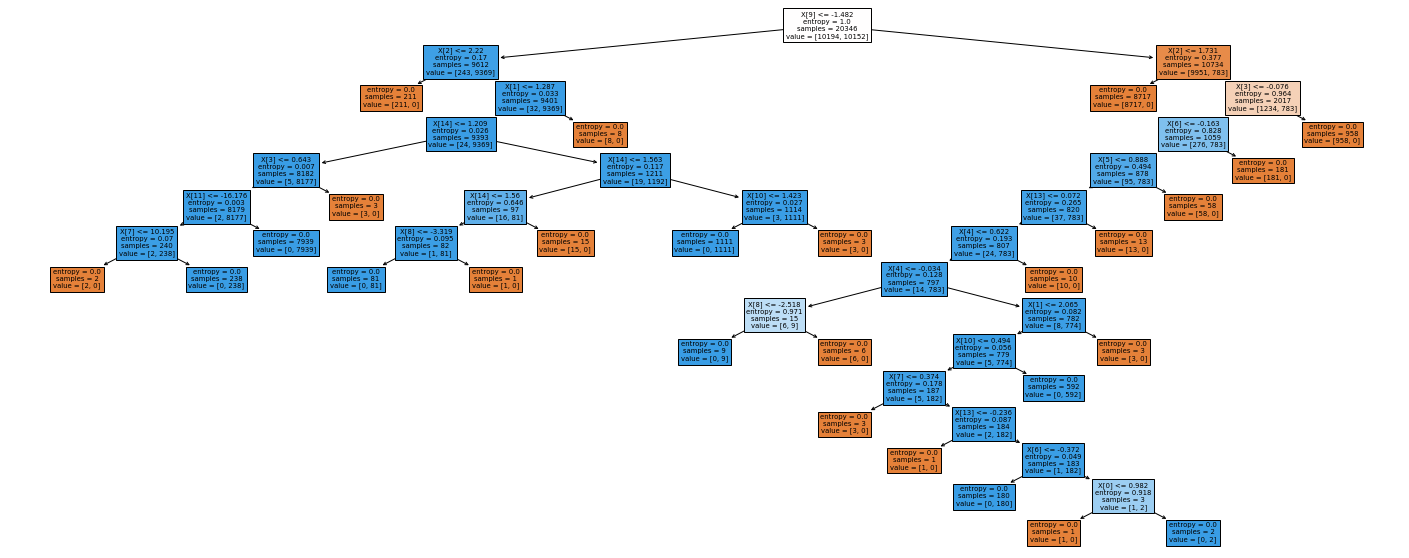

In [29]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

2.Random forest

In [33]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(new_train,y_train_sampled_df)
Y_predicted_rf = rf.predict(new_test)
Y_pred_train_rf = rf.predict(new_train)

In [34]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[4338    0]
 [   1 4381]]

 Macro Averaged Accuracy :0.9998853211009174

 Macro Averaged Precision :0.9998858968507531

 Macro Averaged Recall :0.9998847660751324

 Macro Averaged F1-Score :0.9998853183122417

 Micro Averaged F1-Score:0.9998853211009174


XG Boost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(new_train, y_train_sampled_df)
Y_predicted_gb = gb.predict(new_test)
Y_pred_train_gb = gb.predict(new_train)

In [36]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[4333    0]
 [   6 4381]]

 Macro Averaged Accuracy :0.9993119266055046

 Macro Averaged Precision :0.999316161385913

 Macro Averaged Recall :0.9993085964507951

 Macro Averaged F1-Score :0.999311905755919

 Micro Averaged F1-Score:0.9993119266055046


In [37]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(y_train_sampled_df, dt.predict_proba(new_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test_sampled_df, dt.predict_proba(new_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 99.94271445675213
